In [1]:
#!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


df = pd.read_pickle('pickles/df1.1.pkl') #dataset from previous notebook
df.sample(frac=1).head(10)


,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Continent,Region,...,Pop.Density,Density_Group,Density_Group_encoded,% aging.pop,% young.pop,GDP,% healthcare,GDP_billions,GDP_per_capita,% smoking
6373,Monaco,43.73,7.42,2020-07-09,108,4,96,8,Europe,Southern Europe,...,18771.58,Dense,3,36.65,25.22,6.730736e+09,3.77,6.73,176891.89,26.0
7261,Poland,51.92,19.15,2020-05-18,18885,936,7628,10321,Europe,Eastern Europe,...,122.55,Low,1,27.21,23.31,6.060000e+11,4.67,606.00,16153.22,24.5
8562,Slovenia,46.15,15.00,2020-05-03,1439,96,241,1102,Europe,Eastern Europe,...,104.41,Low,1,31.08,23.38,5.338476e+10,6.84,53.38,25392.07,20.6
9867,United Kingdom,55.38,-3.44,2020-04-22,140397,21074,0,119323,Europe,Western Europe,...,275.88,Moderate,2,29.33,28.33,2.700000e+12,10.17,2700.00,40453.07,15.6
1421,Bosnia and Herzegovina,43.92,17.68,2020-05-06,1987,86,928,973,Europe,Balkans,...,64.44,Low,1,30.58,20.49,2.022604e+10,6.75,20.23,6130.31,36.8
7710,Russia,61.52,105.32,2020-01-24,0,0,0,0,Europe,Eastern Europe,...,8.87,Sparse,0,23.14,26.43,1.490000e+12,5.92,1490.00,10258.52,29.4
5293,Liechtenstein,47.14,9.55,2020-02-20,0,0,0,0,Europe,Western Europe,...,243.13,Moderate,2,27.94,21.83,6.405870e+09,0.39,6.41,164671.09,27.0
879,Azerbaijan,40.14,47.58,2020-05-28,4759,56,3022,1681,Asia,Caucasus,...,122.12,Low,1,9.87,33.55,4.269300e+10,2.33,42.69,4229.91,20.2
7737,Russia,61.52,105.32,2020-02-20,2,0,2,0,Europe,Eastern Europe,...,8.87,Sparse,0,23.14,26.43,1.490000e+12,5.92,1490.00,10258.52,29.4
9609,Ukraine,48.38,31.17,2020-02-12,0,0,0,0,Europe,Eastern Europe,...,77.11,Low,1,25.28,22.60,1.570000e+11,3.73,157.00,3513.88,25.9


In [3]:
#list of columns containing NaNs
nan_cols = df.columns[df.isna().any()].tolist()
print(nan_cols)

#sorted by NaN
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "nunique": df.nunique(),
    "na_%": (df.isna().sum() / len(df) * 100).round(0)
})


summary = summary.reset_index().rename(columns={"index": "column"}).query("`na_%` > 0").sort_values('na_%', ascending=False)
pd.set_option('display.max_rows', None)  # show all rows
summary

['r', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed', 'Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation', 'Transit stations', 'Workplaces', 'c1m_school_closing', 'c2m_workplace_closing', 'c3m_cancel_public_events', 'c4m_restrictions_on_gatherings', 'c5m_close_public_transport', 'c6m_stay_at_home_requirements', 'c7m_restrictions_on_internal_movement', 'c8ev_international_travel_controls', 'e1_income_support', 'e2_debt_contract_relief', 'h1_public_information_campaigns', 'h2_testing_policy', 'h3_contact_tracing', 'h6m_facial_coverings']


,column,dtype,min,max,nunique,na_%
66,new_tests_per_thousand,float64,0.0,25.3,380,54.0
64,new_tests,float64,1.0,355443.0,3673,54.0
70,total_tests_per_thousand,float64,0.0,703.6,3617,52.0
69,total_tests,float64,1.0,27327570.0,4816,52.0
65,new_tests_7day_smoothed,float64,0.0,312164.0,4122,49.0
67,new_tests_per_thousand_7day_smoothed,float64,0.0,18.6,344,49.0
25,Parks,float64,-83.71,349.43,1761,34.0
34,Residential,float64,-4.29,34.33,302,34.0
19,Grocery and pharmacy,float64,-65.29,29.43,688,33.0
35,Retail and recreation,float64,-91.71,21.29,843,33.0


In [4]:
# # --- r-related NaNs---

In [5]:
# Flag missing r
df["r_missing"] = df["r"].isna()

# Compute streak groups within each country
df["group"] = (df.groupby("Country/Region")["r_missing"].transform(lambda x: (x != x.shift()).cumsum()))

# Filter only rows where R is missing
missing_segments = df[df["r_missing"]].copy()

# Aggregate to get start, end, and length of each streak
streaks = (
    missing_segments
    .groupby(["Country/Region", "group"], as_index=False)
    .agg(
        start_date=("Date", "min"),
        end_date=("Date", "max"),
        missing_days=("Date", "count")
    )
    .sort_values(["Country/Region", "start_date"])
)

print(streaks.sort_values("missing_days", ascending=False).head(15))
print(f"\nTotal missing streaks: {len(streaks)}")

# An additional check was performed to verify that there were no NaN values appearing mid-series (i.e., isolated gaps within the data).  
# Nothing of the sort was found. However, if this dataset is ever used for other countries, running a similar check is recommended; 




   Country/Region  group start_date   end_date  missing_days
28  Liechtenstein      1 2020-01-22 2020-07-27           188
33         Monaco      1 2020-01-22 2020-06-21           152
52     Tajikistan      1 2020-01-22 2020-05-04           104
26     Kyrgyzstan      1 2020-01-22 2020-03-31            70
34     Montenegro      1 2020-01-22 2020-03-31            70
25         Kosovo      1 2020-01-22 2020-03-31            70
5         Belarus      1 2020-01-22 2020-03-30            69
16        Georgia      1 2020-01-22 2020-03-30            69
56     Uzbekistan      1 2020-01-22 2020-03-28            67
24     Kazakhstan      1 2020-01-22 2020-03-26            65
4      Azerbaijan      1 2020-01-22 2020-03-26            65
29      Lithuania      1 2020-01-22 2020-03-25            64
54        Ukraine      1 2020-01-22 2020-03-25            64
10         Cyprus      1 2020-01-22 2020-03-24            63
0         Albania      1 2020-01-22 2020-03-23            62

Total missing streaks: 

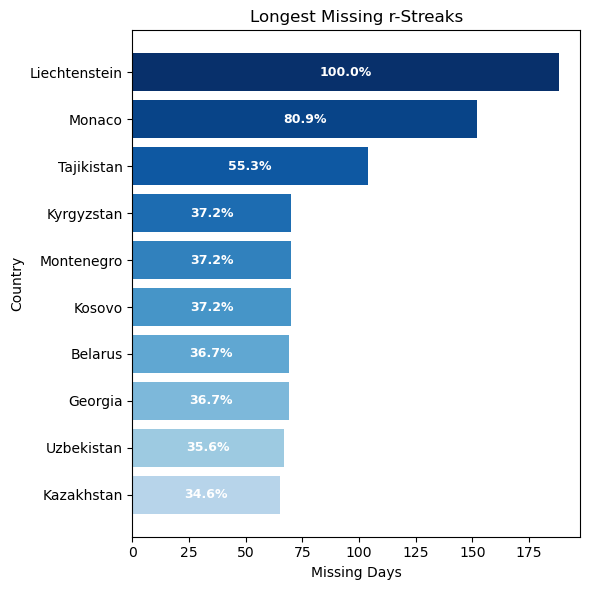

In [6]:
streaks_top = streaks.sort_values("missing_days", ascending=False).head(10) #top 10 missing r-Streaks per country
total_days = (df["Date"].max() - df["Date"].min()).days + 1 #added to helpers

# Compute and format percentage label
streaks_top["missing_pct"] = (streaks_top["missing_days"] / total_days * 100).round(1)
streaks_top["missing_label"] = streaks_top["missing_pct"].astype(str) + "%"

colors = plt.cm.Blues_r(np.linspace(0, 0.7, len(streaks_top)))

plt.figure(figsize=(6, 6))
bars = plt.barh(streaks_top["Country/Region"], streaks_top["missing_days"], color=colors)
plt.xlabel("Missing Days")
plt.ylabel("Country")
plt.title("Longest Missing r-Streaks")
plt.gca().invert_yaxis()

# Add percentage labels inside bars
for bar, label in zip(bars, streaks_top["missing_label"]):
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2,
             label, ha='center', va='center', color='white', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#see documentation on outliers handling section

In [7]:
#manually calculate r based on active cases
#excluding days where active is less than 100, see documentation

old_r = df["r"].copy()
df = df.sort_values(["Country/Region", "Date"]).reset_index(drop=True)
SI = 7  # serial interval (days) # serial interval (days)

# daily new confirmed cases (calculating this a second time, will be removed later)
df["New_cases"] = df.groupby("Country/Region")["Confirmed"].diff().clip(lower=0)
df["Prev_cases"] = df.groupby("Country/Region")["New_cases"].shift(SI)

# compute R only where denominator > 0 AND Active >= 100
valid = (df["Prev_cases"] > 0) & (df["Active"] >= 100)
df["R_est"] = np.where(valid, df["New_cases"] / df["Prev_cases"], np.nan)

# smooth with 7-day rolling mean and clip to realistic range
df["R_est"] = (
    df.groupby("Country/Region")["R_est"]
      .transform(lambda x: x.replace([np.inf, -np.inf], np.nan)
                            .rolling(7, min_periods=1)
                            .mean())
      .clip(0, 6)
)

# first confirmed-case date per country
first_case = df[df["Confirmed"] > 0].groupby("Country/Region")["Date"].min()
df["first_case_date"] = df["Country/Region"].map(first_case)

# fill only after outbreak starts
active_mask = df["Date"] >= df["first_case_date"]
df.loc[active_mask, "r"] = df.loc[active_mask, "r"].fillna(df.loc[active_mask, "R_est"])
df.loc[active_mask, "r"] = (
    df.loc[active_mask]
      .groupby("Country/Region")["r"]
      .ffill()
      .clip(0, 6)
)


# recalculate missing streaks
df = df.sort_values(["Country/Region", "Date"]).reset_index(drop=True)
df["r_missing"] = df["r"].isna()
df["group"] = df.groupby("Country/Region")["r_missing"].transform(lambda x: (x != x.shift()).cumsum())

missing_segments = df[df["r_missing"]].copy()
streaks = (
    missing_segments
    .groupby(["Country/Region", "group"], as_index=False)
    .agg(
        start_date=("Date", "min"),
        end_date=("Date", "max"),
        missing_days=("Date", "count")
    )
    .sort_values(["Country/Region", "start_date"])
)

changed_rows = (df["r"] != old_r) & ~(df["r"].isna() & old_r.isna())
num_changed = changed_rows.sum()

print(f"Rows with updated r values: {num_changed}") 

#all this work, only produced a few valid cases
#the rest are true NANs.. either disease spread was halted/did not yet reach the country in sufficient numbers
#or disease was underreported

# Create a flag for where r is NaN
df["r_nan_flag"] = df["r"].isna().astype(int)


Rows with updated r values: 41


In [8]:
mask = df["r"].isna() & (df["Active"] > 100)

count = mask.sum()
total_missing_r = df["r"].isna().sum()
percentage = (count / total_missing_r * 100).round(2)

print(f"Rows where r is NaN and Active < 100: {count} ({percentage}%)")

df.loc[mask, ["Country/Region", "Date", "Active", "Confirmed", "Deaths","New_cases","Prev_cases", "r"]] #check that all NaNs are legitimate

Rows where r is NaN and Active < 100: 16 (0.49%)


,Country/Region,Date,Active,Confirmed,Deaths,New_cases,Prev_cases,r
248,Andorra,2020-03-22,111,113,1,25.0,0.0,NaN
1172,Belgium,2020-03-06,108,109,0,59.0,0.0,NaN
2496,Estonia,2020-03-14,115,115,0,36.0,0.0,NaN
3235,Germany,2020-03-01,114,130,0,51.0,0.0,NaN
4000,Ireland,2020-03-14,127,129,2,39.0,0.0,NaN
4356,Italy,2020-02-23,150,155,3,93.0,0.0,NaN
4769,Kosovo,2020-03-31,105,112,1,18.0,0.0,NaN
6077,Moldova,2020-03-23,107,109,1,15.0,0.0,NaN
6828,North Macedonia,2020-03-22,113,115,1,30.0,0.0,NaN
7572,Romania,2020-03-14,114,123,0,34.0,0.0,NaN


In [9]:
# clean up
df = df.drop(columns=["New_cases", "Prev_cases", "R_est", "r_missing","group","first_case_date"], errors="ignore")

# Fill NaNs with 0 (for ML purposes, might need to reverse back to NaN later)
df["r"] = df["r"].fillna(0)


In [10]:
#----mobility NaNs -----

mobility_cols = ['Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation', 'Transit stations', 'Workplaces']

#Restrictions didn't start until February/March, therefore everything before this date should be counted as baseline

start_date = df.loc[~df[mobility_cols].isna().all(axis=1), "Date"].min()
print(f"Mobility data begins on: {start_date.date()}")

mask_pre_mobility = df["Date"] < start_date
df.loc[mask_pre_mobility, mobility_cols] = 0

print(f"Updated {mask_pre_mobility.sum()} rows to baseline (0).")


Mobility data begins on: 2020-02-17
Updated 1404 rows to baseline (0).


In [11]:
# difference to mobility NaNs

#sorted by NaN
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "nunique": df.nunique(),
    "na_%": (df.isna().sum() / len(df) * 100).round(0)
})


summary = (
    summary.reset_index()
    .rename(columns={"index": "column"})
    .query("`na_%` > 0")
    .query("column in @mobility_cols")
    .sort_values('na_%', ascending=False)
)
pd.set_option('display.max_rows', None)  # show all rows
summary

,column,dtype,min,max,nunique,na_%
19,Grocery and pharmacy,float64,-65.29,29.43,688,20.0
25,Parks,float64,-83.71,349.43,1761,20.0
34,Residential,float64,-4.29,34.33,302,20.0
35,Retail and recreation,float64,-91.71,21.29,843,20.0
37,Transit stations,float64,-86.14,18.43,785,18.0
49,Workplaces,float64,-75.57,19.29,772,18.0


In [12]:


# Calculate % of NaNs per country across all mobility columns
mobility_nan_by_country = (
    df.groupby("Country/Region")[mobility_cols]
      .apply(lambda x: x.isna().mean().mean() * 100)
      .sort_values(ascending=False)
      .round(1)
)

# Display summary
print(mobility_nan_by_country[mobility_nan_by_country > 0])

#countries data privacy restrictions (all 100%) or where data was not gathered

Country/Region
Albania          86.2
Andorra          86.2
Armenia          86.2
Azerbaijan       86.2
Iceland          86.2
Cyprus           86.2
San Marino       86.2
Montenegro       86.2
Monaco           86.2
Uzbekistan       86.2
Kosovo           86.2
Liechtenstein    48.5
Georgia          23.9
Serbia           23.9
dtype: float64


In [13]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


# 1️⃣ Define your key column groups
policy_cols = [
    'c1m_school_closing', 'c2m_workplace_closing', 'c3m_cancel_public_events',
    'c4m_restrictions_on_gatherings', 'c5m_close_public_transport',
    'c6m_stay_at_home_requirements', 'c7m_restrictions_on_internal_movement',
    'c8ev_international_travel_controls', 'e1_income_support',
    'e2_debt_contract_relief', 'h1_public_information_campaigns',
    'h2_testing_policy', 'h3_contact_tracing', 'h6m_facial_coverings'
]

mobility_cols = [
    'Grocery and pharmacy', 'Parks', 'Residential',
    'Retail and recreation', 'Transit stations', 'Workplaces'
]

# Optional region code or one-hot (whichever you have)
extra_features = ['Region_encoded']

#Create missingness flags BEFORE imputation (so model knows)
for col in mobility_cols:
    df[f"{col}_missing"] = df[col].isna().astype(int)

#Select features for imputation
impute_features = policy_cols + mobility_cols + extra_features

#Standardize for KNN distance metric
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[impute_features])

#Apply KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_scaled = imputer.fit_transform(scaled_data)

#Inverse scale back to original feature space
df[impute_features] = scaler.inverse_transform(imputed_scaled)




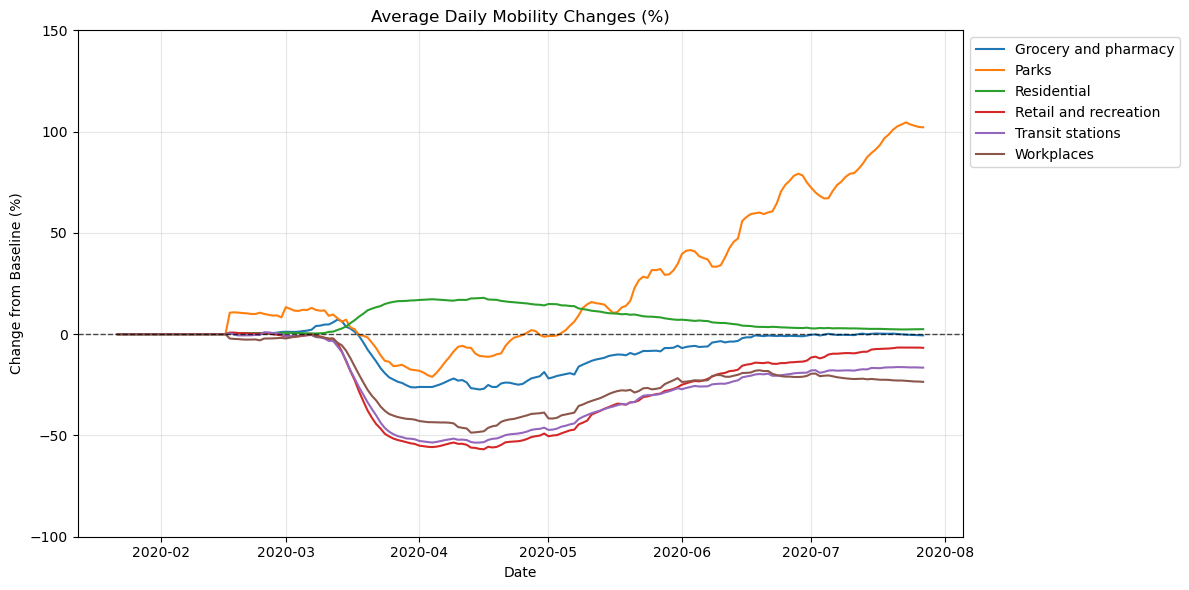

In [14]:
#after imputing, smoother but close to identical to original graph

daily_avg = (
    df.groupby("Date")[mobility_cols]
      .mean()
      .reset_index()
)

# --- Plot ---
plt.figure(figsize=(12, 6))

for col in mobility_cols:
    plt.plot(daily_avg["Date"], daily_avg[col], label=col)

plt.title("Average Daily Mobility Changes (%)")
plt.xlabel("Date")
plt.ylabel("Change from Baseline (%)")
plt.ylim(-100, 150)
plt.axhline(0, color="black", lw=1, linestyle="--", alpha=0.7)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# remaining list of columns containing NaNs
nan_cols = df.columns[df.isna().any()].tolist()
print(nan_cols)

#sorted by NaN
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "nunique": df.nunique(),
    "na_%": (df.isna().sum() / len(df) * 100).round(0)
})


summary = summary.reset_index().rename(columns={"index": "column"}).query("`na_%` > 0").sort_values('na_%', ascending=False)
pd.set_option('display.max_rows', None)  # show all rows
summary

['total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed']


,column,dtype,min,max,nunique,na_%
70,new_tests,float64,1.0,355443.0,3673,54.0
72,new_tests_per_thousand,float64,0.0,25.3,380,54.0
77,total_tests_per_thousand,float64,0.0,703.6,3617,52.0
76,total_tests,float64,1.0,27327570.0,4816,52.0
71,new_tests_7day_smoothed,float64,0.0,312164.0,4122,49.0
73,new_tests_per_thousand_7day_smoothed,float64,0.0,18.6,344,49.0


In [16]:
#----testing----

Countries with ALL testing data missing:
['Andorra', 'Azerbaijan', 'Georgia', 'Kosovo', 'Kyrgyzstan', 'Moldova', 'Monaco', 'Montenegro', 'San Marino', 'Tajikistan', 'Uzbekistan']

Total: 11 countries


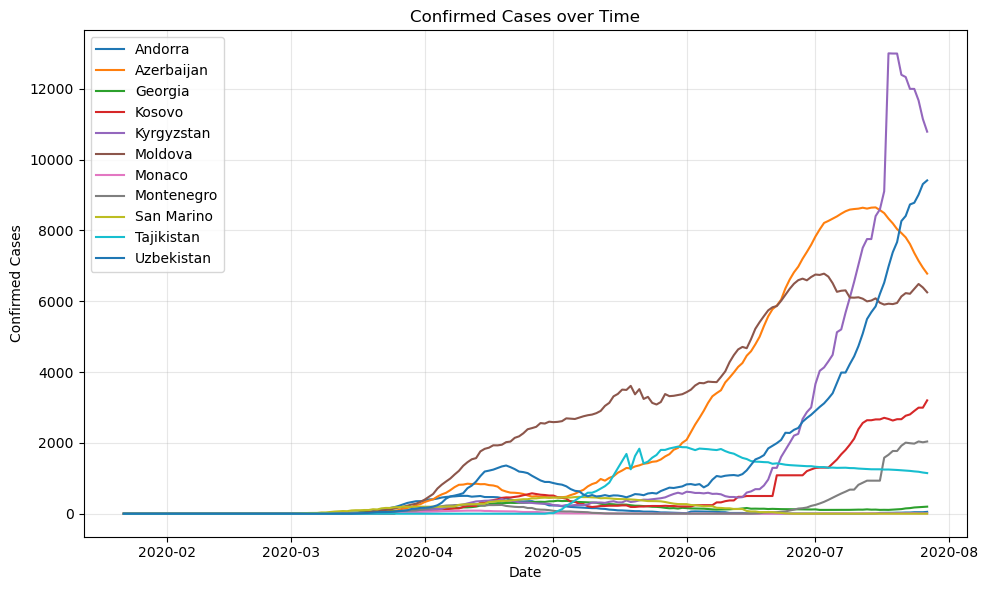

In [17]:
testing_cols = [
    'total_tests', 'new_tests', 'total_tests_per_thousand',
    'new_tests_per_thousand', 'new_tests_7day_smoothed',
    'new_tests_per_thousand_7day_smoothed'
]

# Calculate % of NaNs per country across all mobility columns
all_nan_testing = (
    df.groupby("Country/Region")[testing_cols]
      .apply(lambda x: x.isna().all().all())
)

countries_all_nan = all_nan_testing[all_nan_testing].index.tolist()

# Display summary
print("Countries with ALL testing data missing:")
print(countries_all_nan)
print(f"\nTotal: {len(countries_all_nan)} countries")



plt.figure(figsize=(10, 6))

for country in countries_all_nan:
    subset = df[df["Country/Region"] == country]
    plt.plot(subset["Date"], subset["Active"], label=country)

plt.title("Confirmed Cases over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [18]:
# testing NaNs

#sorted by NaN
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "nunique": df.nunique(),
    "na_%": (df.isna().sum() / len(df) * 100).round(0)
})


summary = (
    summary.reset_index()
    .rename(columns={"index": "column"})
    .query("`na_%` > 0")
    .query("column in @testing_cols")
    .sort_values('na_%', ascending=False)
)
pd.set_option('display.max_rows', None)  # show all rows
summary

,column,dtype,min,max,nunique,na_%
70,new_tests,float64,1.0,355443.0,3673,54.0
72,new_tests_per_thousand,float64,0.0,25.3,380,54.0
77,total_tests_per_thousand,float64,0.0,703.6,3617,52.0
76,total_tests,float64,1.0,27327570.0,4816,52.0
71,new_tests_7day_smoothed,float64,0.0,312164.0,4122,49.0
73,new_tests_per_thousand_7day_smoothed,float64,0.0,18.6,344,49.0


In [19]:
who = pd.read_pickle(r'pickles\worldometer_data.pkl') #who snapshot of late July, shows last testing data per country

df["total_tests"] = df["total_tests"].astype("float64")


df = df.sort_values(["Country/Region", "Date"]).copy()
df["Tests_Estimated_Flag"] = 0

who_tests = who.set_index("Country/Region")["TotalTests"].to_dict()

for country in countries_all_nan:
    if country not in who_tests:
        continue

    mask = df["Country/Region"] == country
    sub = df.loc[mask].copy()
    total_tests_final = who_tests[country]

    # find first day with confirmed cases
    first_confirmed_idx = sub.index[sub["Confirmed"] > 0]
    if first_confirmed_idx.empty:
        continue

    start_idx = first_confirmed_idx[0]
    valid_sub = sub.loc[start_idx:]

    n = len(valid_sub)
    pop = sub["Population"].iloc[0] if "Population" in sub.columns else None
    if pop and total_tests_final > 1.2 * pop:
        total_tests_final = 1.2 * pop

    # exponential-like curve
    x = np.linspace(0, 1, n)
    growth = (np.exp(x * 3) - 1) / (np.exp(3) - 1)
    estimated = growth * total_tests_final

    # fill directly into df["total_tests"]
    df.loc[valid_sub.index, "total_tests"] = estimated
    df.loc[valid_sub.index, "Tests_Estimated_Flag"] = 1

df["Tests_Estimated_Flag"] = df["Tests_Estimated_Flag"].astype(int)


In [20]:
# difference to testing NaNs

#sorted by NaN
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "nunique": df.nunique(),
    "na_%": (df.isna().sum() / len(df) * 100).round(0)
})


summary = (
    summary.reset_index()
    .rename(columns={"index": "column"})
    .query("`na_%` > 0")
    .query("column == 'total_tests'")
    .sort_values('na_%', ascending=False)
)
pd.set_option('display.max_rows', None)  # show all rows
summary

,column,dtype,min,max,nunique,na_%
77,total_tests,float64,0.0,27327570.0,6102,39.0


<Axes: >

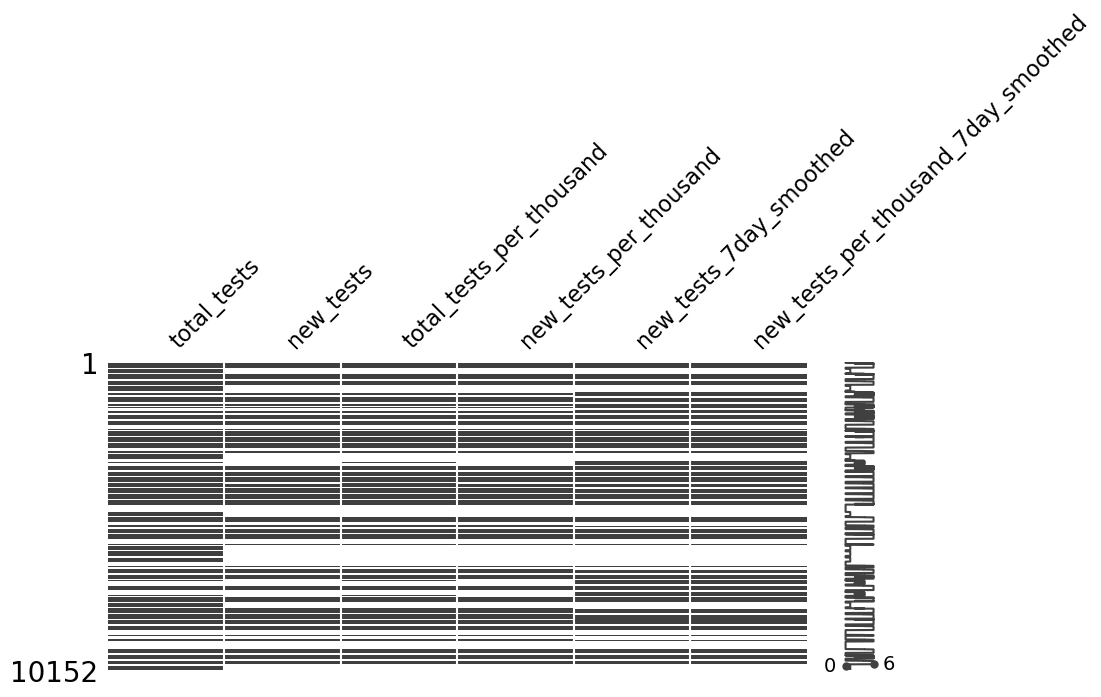

In [21]:
msno.matrix(df[testing_cols], figsize=(10, 4))

In [22]:
#we know the pandemic didn't hit everywhere at the same time. therefore, testing was likely 0 before outbreak started
#or close to zero

for country in df['Country/Region'].unique():
    first_case_date = df.loc[
        (df['Country/Region'] == country) & (df['Active'] > 0), 'Date'
    ].min()
    
    df.loc[
        (df['Country/Region'] == country) & (df['Date'] < first_case_date),
        testing_cols
    ] = df.loc[
        (df['Country/Region'] == country) & (df['Date'] < first_case_date),
        testing_cols
    ].fillna(0)

<Axes: >

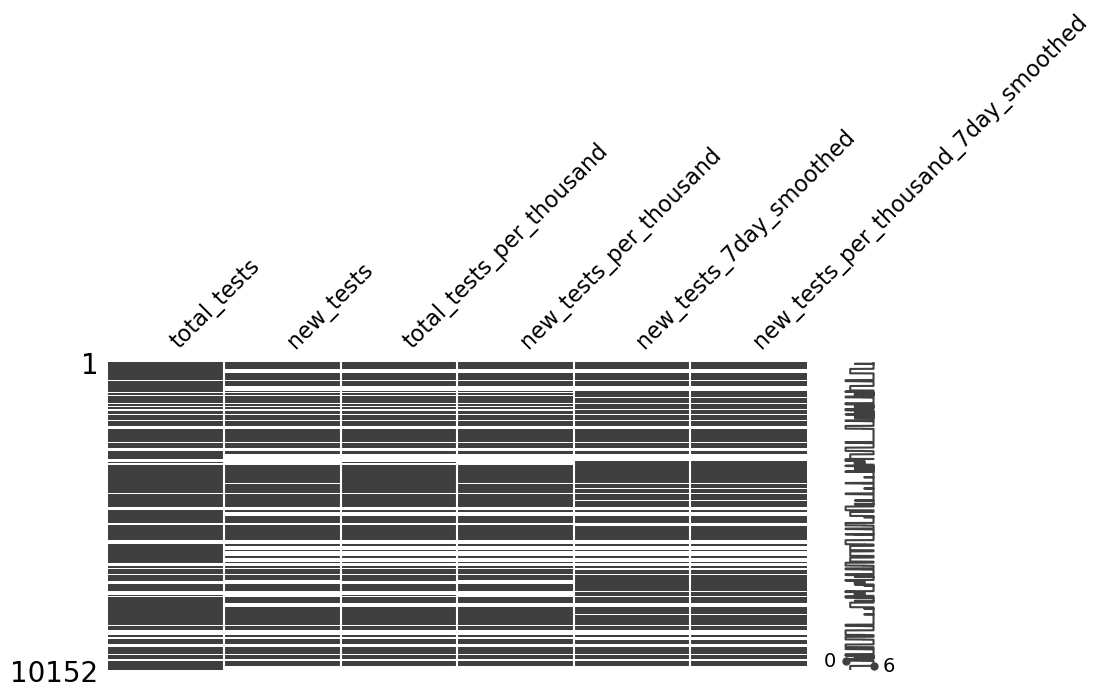

In [23]:
msno.matrix(df[testing_cols], figsize=(10, 4))

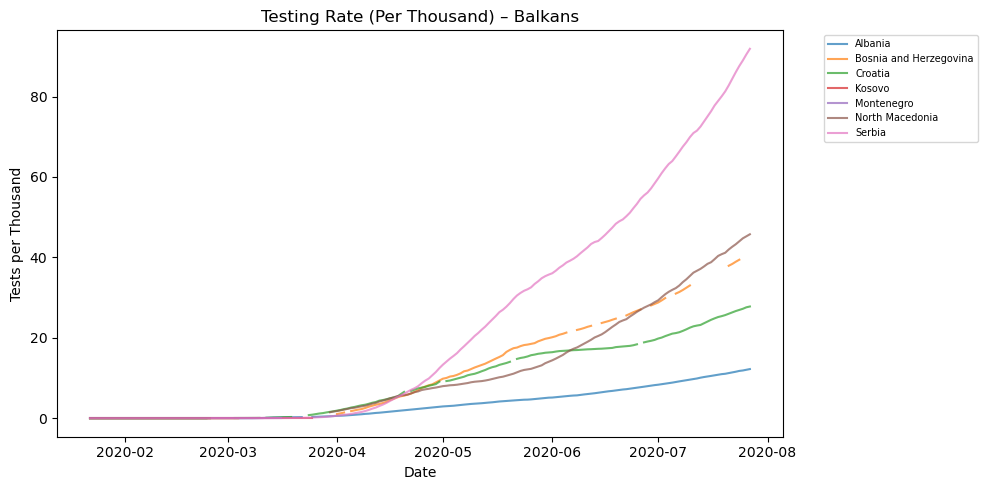

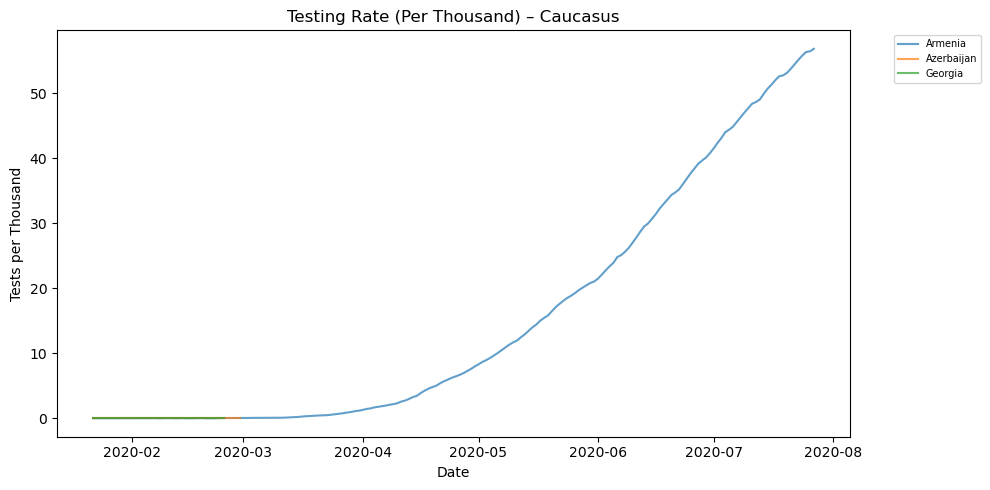

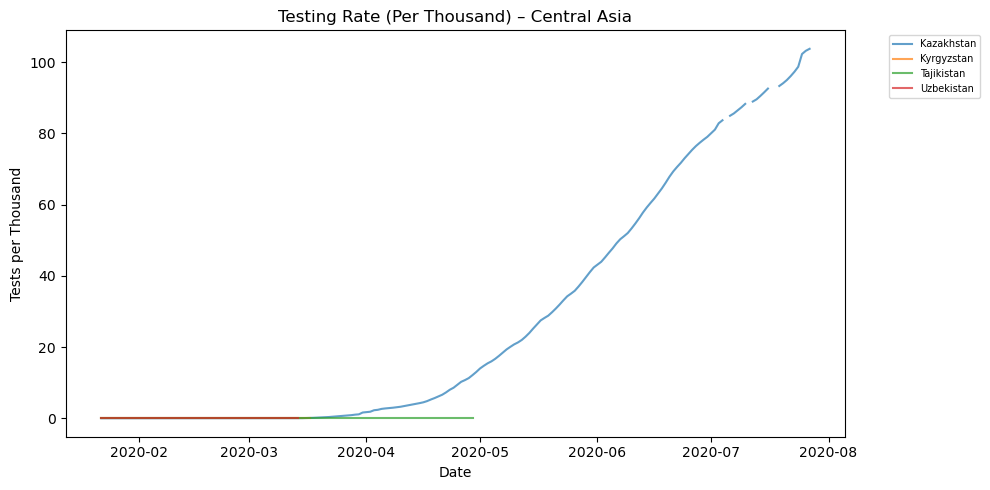

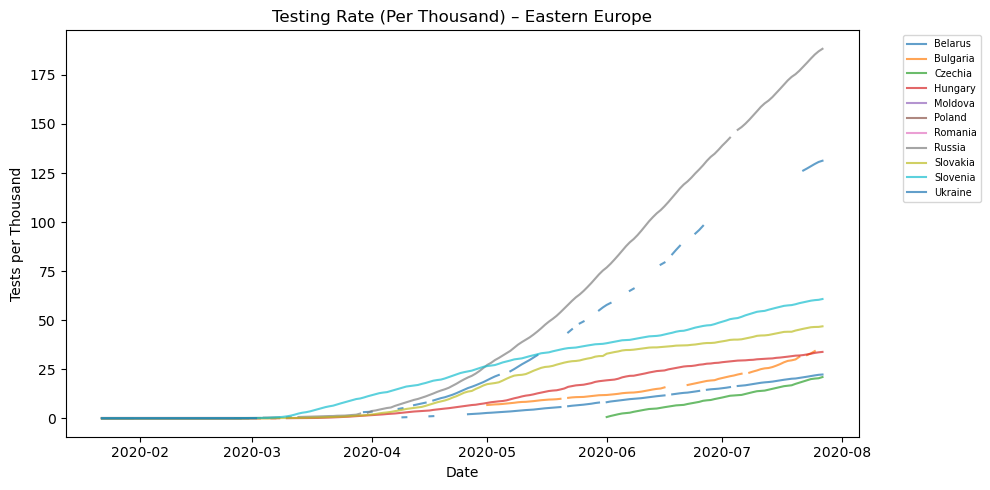

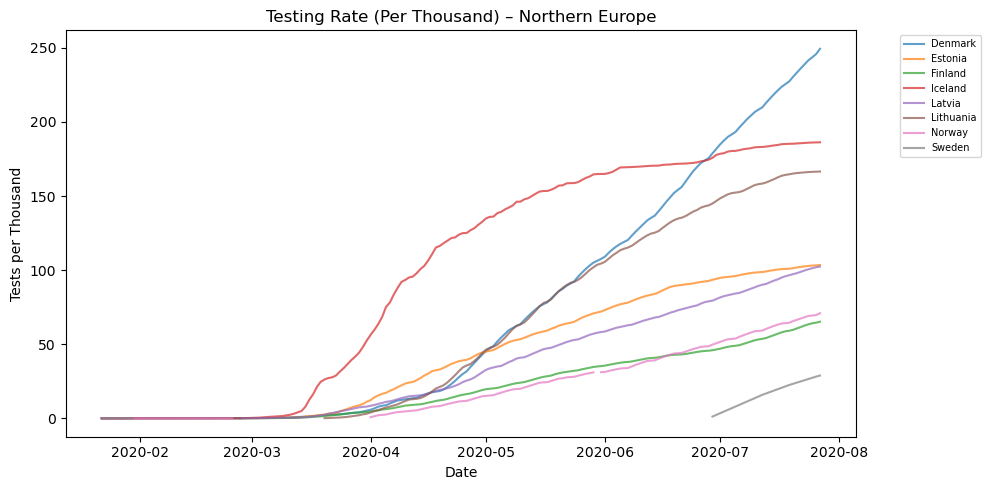

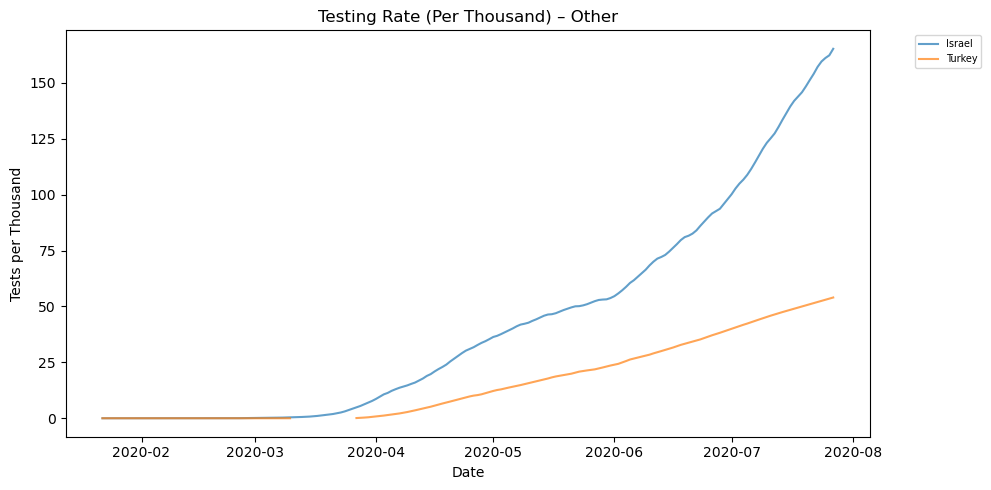

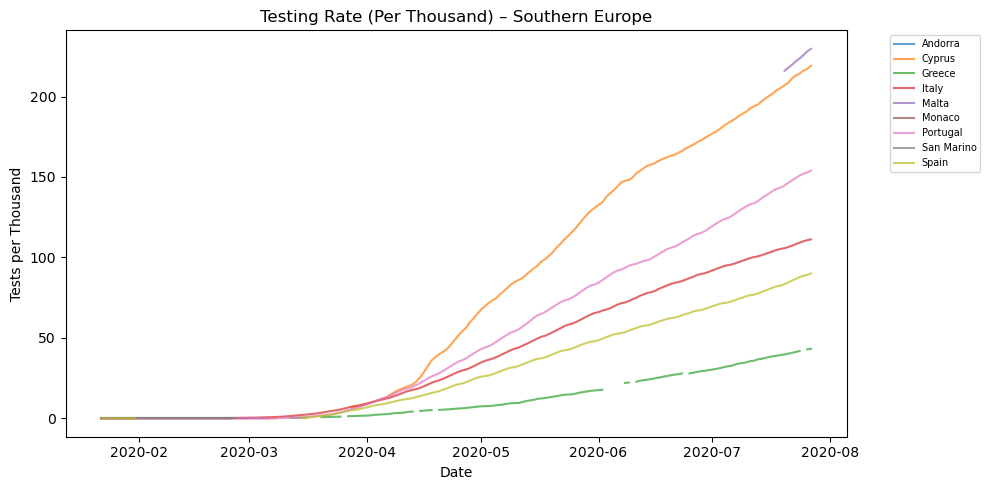

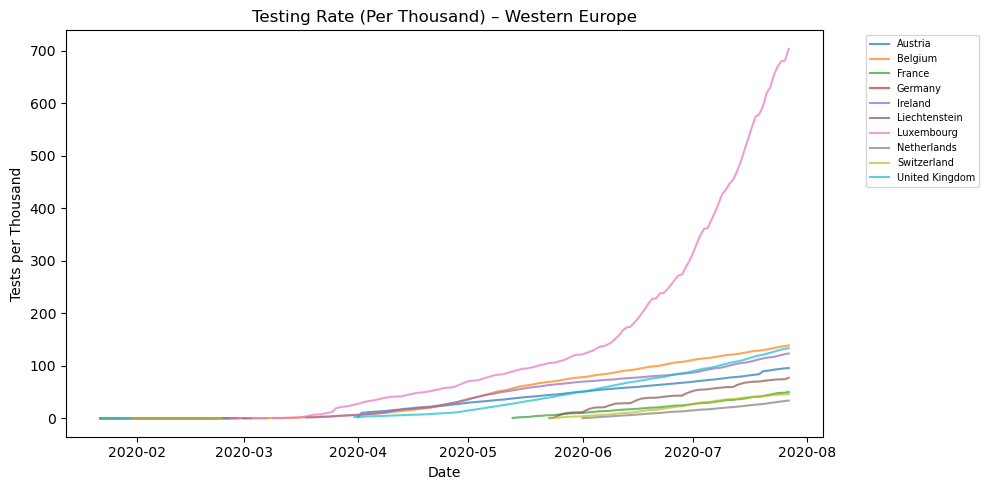

In [24]:
for region_name, subset in df.groupby("Region"):
    plt.figure(figsize=(10,5))
    for country, group in subset.groupby("Country/Region"):
        plt.plot(group["Date"], group["total_tests_per_thousand"], label=country, alpha=0.7)

    plt.title(f"Testing Rate (Per Thousand) – {region_name}")
    plt.xlabel("Date")
    plt.ylabel("Tests per Thousand")
    plt.legend(fontsize=7, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [25]:
testing_cols = [
    'total_tests',
    'new_tests',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_7day_smoothed',
    'new_tests_per_thousand_7day_smoothed'
]

# Calculate % of missing test data per country
missing_tests = (
    df.groupby('Country/Region')[testing_cols]
      .apply(lambda x: x.isna().mean().mean() * 100)  # mean % NaN across all testing cols
      .reset_index(name='missing_%')
      .sort_values('missing_%', ascending=False)
)

missing_tests

,Country/Region,missing_%
47,Sweden,81.028369
31,Malta,73.226950
17,Germany,71.099291
16,Georgia,67.819149
42,San Marino,67.375887
33,Monaco,66.489362
4,Azerbaijan,66.046099
25,Kosovo,65.957447
1,Andorra,65.602837
32,Moldova,62.943262


In [26]:
testing_cols = [
    "total_tests", "new_tests", "total_tests_per_thousand",
    "new_tests_per_thousand", "new_tests_7day_smoothed",
    "new_tests_per_thousand_7day_smoothed"
]

# 1. Calculate % missing per country
missing_rate = (
    df.groupby("Country/Region")[testing_cols]
      .apply(lambda x: x.isna().mean().mean())  # fraction missing across all testing cols
)

# 2. Identify countries with <50% missing data
eligible_countries = missing_rate[missing_rate < 0.5].index

# 3. Sort by country/date and interpolate only for eligible ones
df = df.sort_values(["Country/Region", "Date"])

for col in testing_cols:
    df.loc[df["Country/Region"].isin(eligible_countries), col] = (
        df[df["Country/Region"].isin(eligible_countries)]
        .groupby("Country/Region")[col]
        .transform(lambda x: x.interpolate(method="linear", limit_direction="both"))
    )

print(f"✅ Interpolated testing data for {len(eligible_countries)} countries (<50% missing)")


✅ Interpolated testing data for 36 countries (<50% missing)


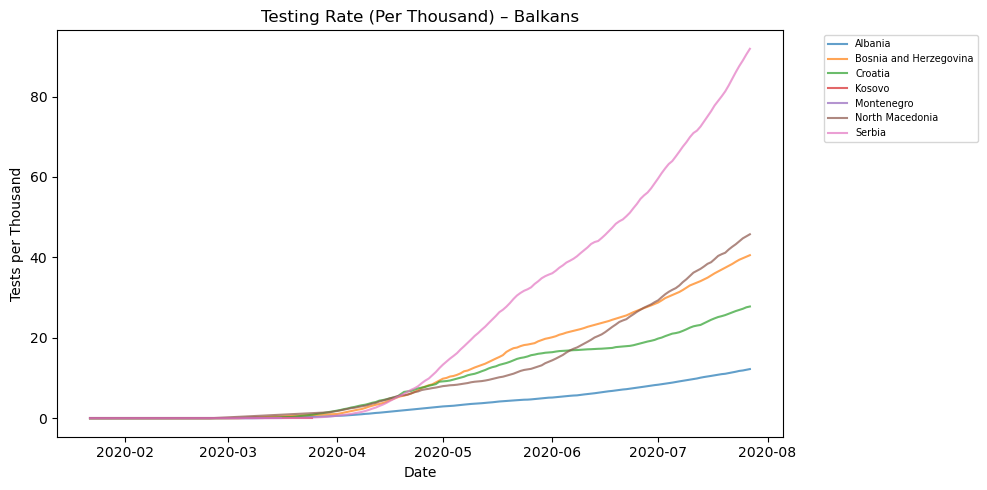

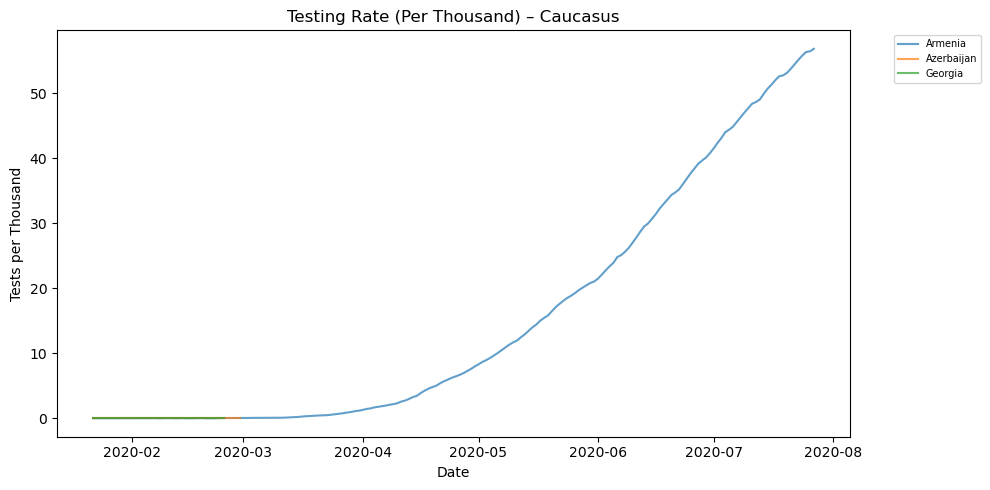

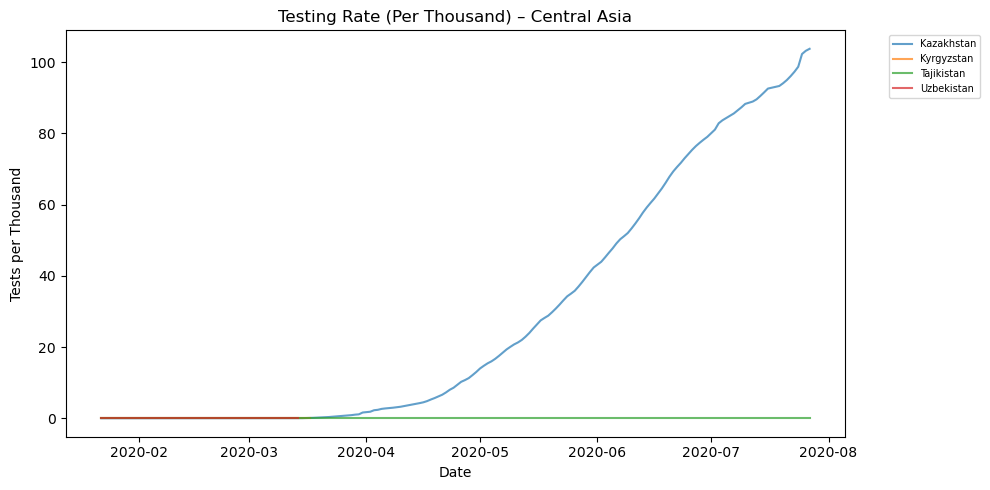

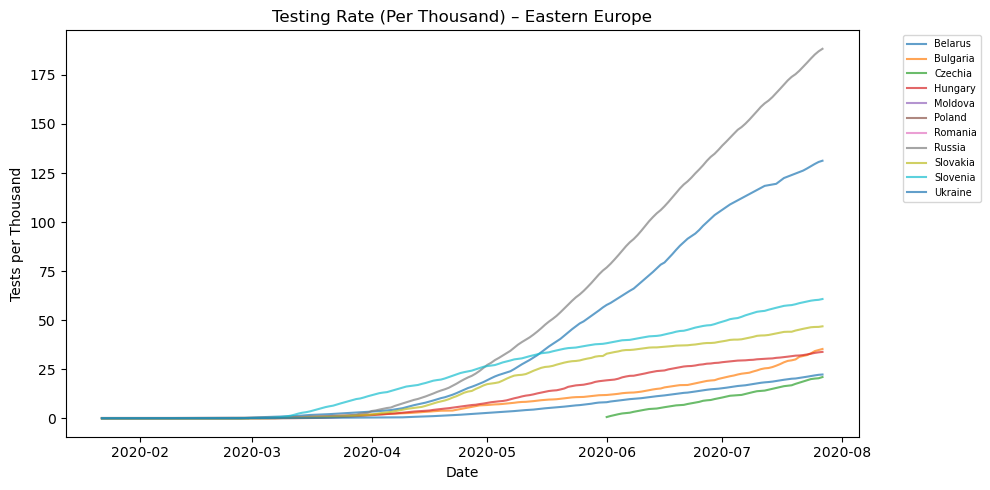

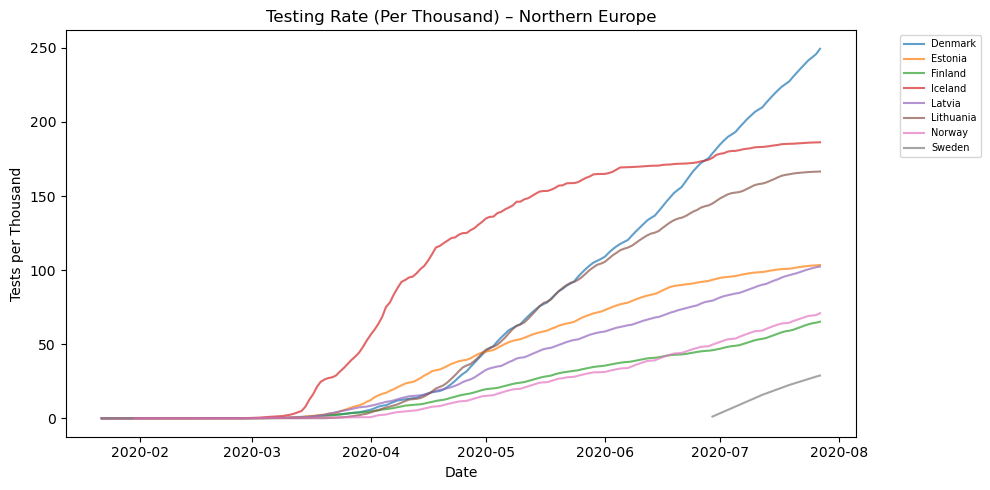

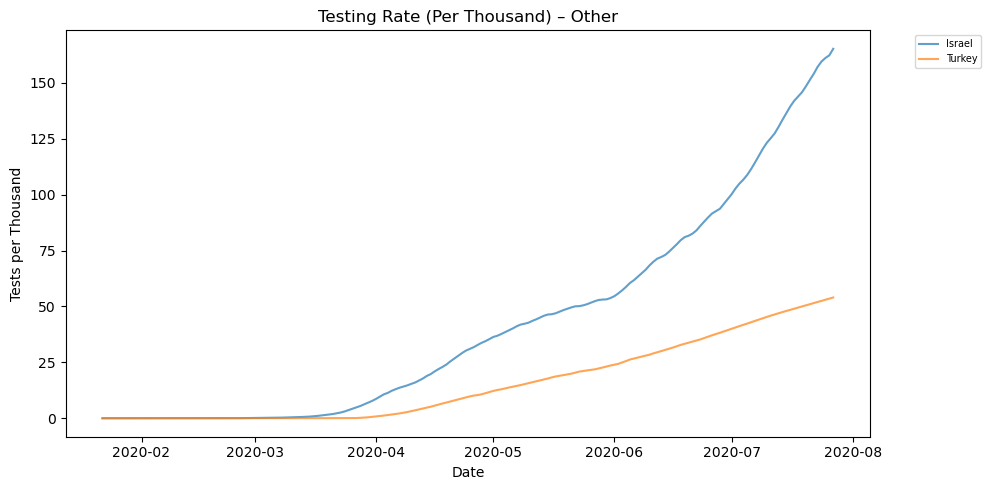

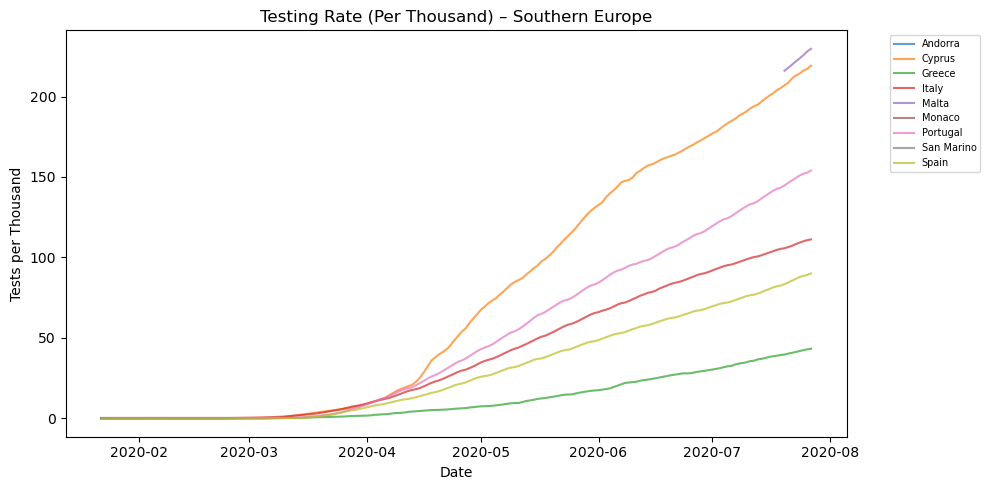

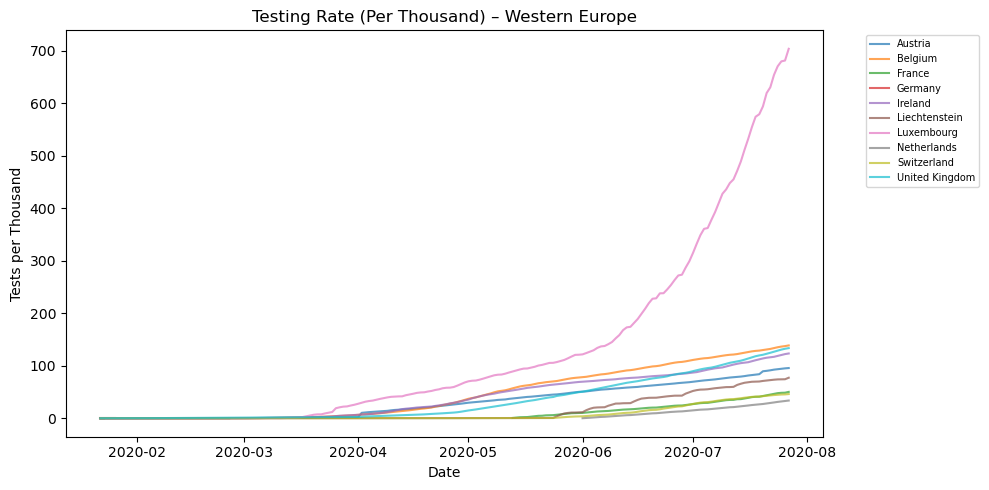

In [27]:
for region_name, subset in df.groupby("Region"):
    plt.figure(figsize=(10,5))
    for country, group in subset.groupby("Country/Region"):
        plt.plot(group["Date"], group["total_tests_per_thousand"], label=country, alpha=0.7)

    plt.title(f"Testing Rate (Per Thousand) – {region_name}")
    plt.xlabel("Date")
    plt.ylabel("Tests per Thousand")
    plt.legend(fontsize=7, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [28]:
# Ensure proper order
df = df.sort_values(["Country/Region", "Date"])

# Fill missing total_tests only where NaN
mask_missing_tests = df["total_tests"].isna()
df.loc[mask_missing_tests, "total_tests"] = df.loc[mask_missing_tests, "Confirmed"] * 3

# Ensure monotonic growth for total_tests per country
df["total_tests"] = df.groupby("Country/Region")["total_tests"].transform(lambda x: x.cummax())

# Update dependent columns only where they are NaN
mask_new_tests = df["new_tests"].isna()
df.loc[mask_new_tests, "new_tests"] = (
    df.groupby("Country/Region")["total_tests"].diff().clip(lower=0)
)

mask_total_per_thousand = df["total_tests_per_thousand"].isna()
df.loc[mask_total_per_thousand, "total_tests_per_thousand"] = (
    df["total_tests"] / df["Population"] * 1000
)

mask_new_per_thousand = df["new_tests_per_thousand"].isna()
df.loc[mask_new_per_thousand, "new_tests_per_thousand"] = (
    df["new_tests"] / df["Population"] * 1000
)

mask_new_smoothed = df["new_tests_7day_smoothed"].isna()
df.loc[mask_new_smoothed, "new_tests_7day_smoothed"] = (
    df.groupby("Country/Region")["new_tests"]
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

mask_new_per_thousand_smoothed = df["new_tests_per_thousand_7day_smoothed"].isna()
df.loc[mask_new_per_thousand_smoothed, "new_tests_per_thousand_7day_smoothed"] = (
    df["new_tests_7day_smoothed"] / df["Population"] * 1000
)

print("✅ Filled only missing testing data (no overwrite of existing values).")


✅ Filled only missing testing data (no overwrite of existing values).


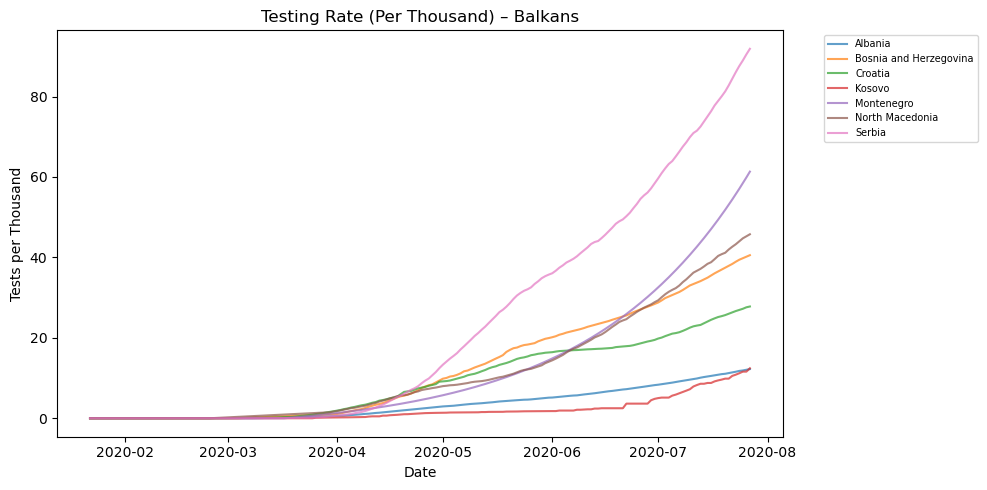

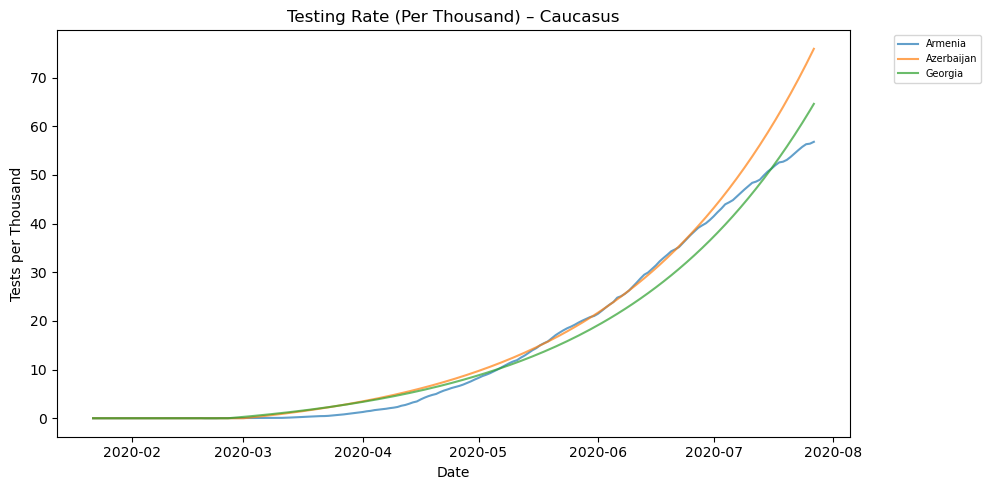

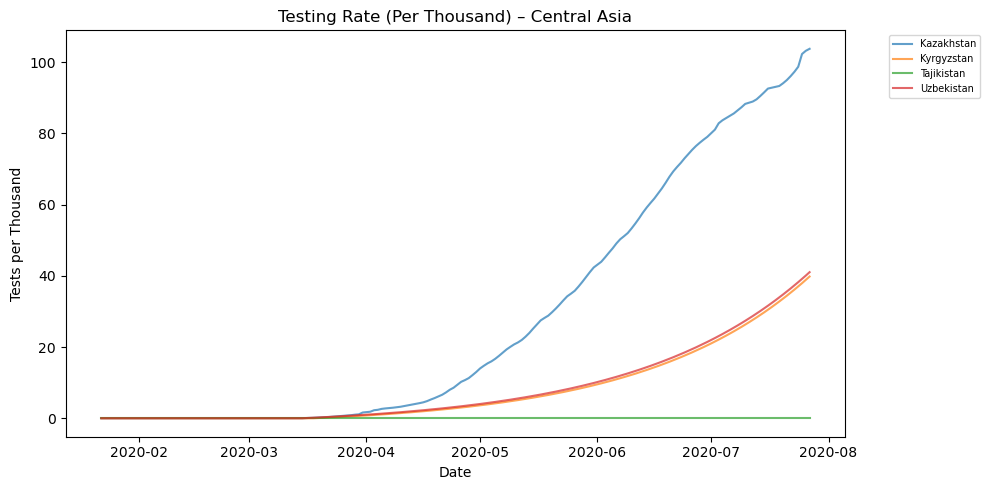

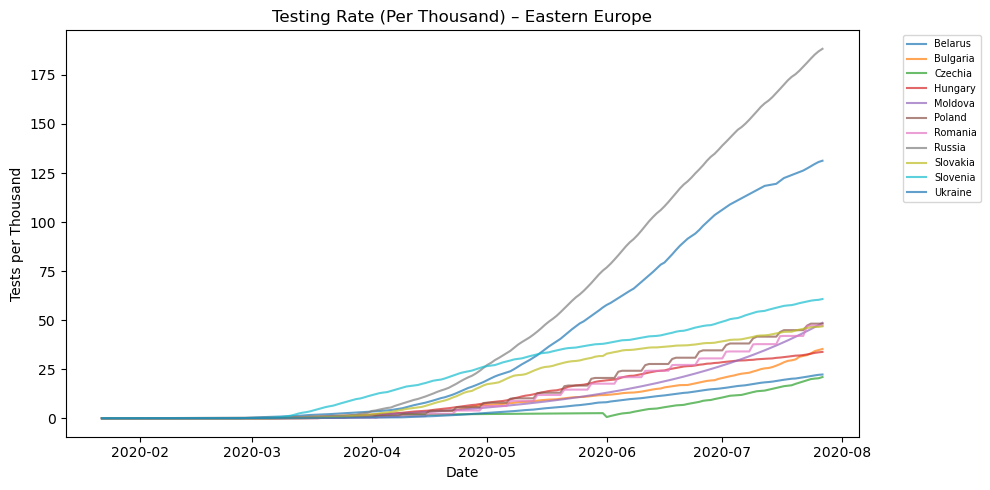

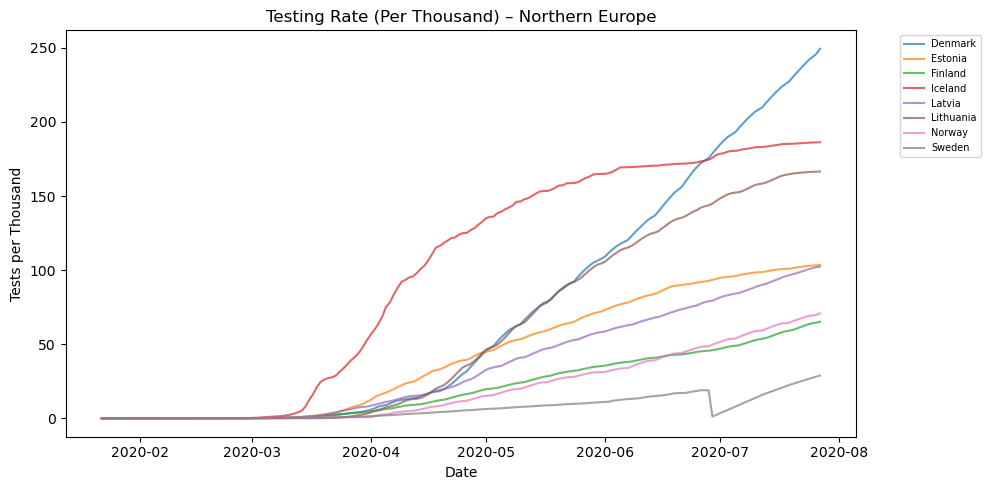

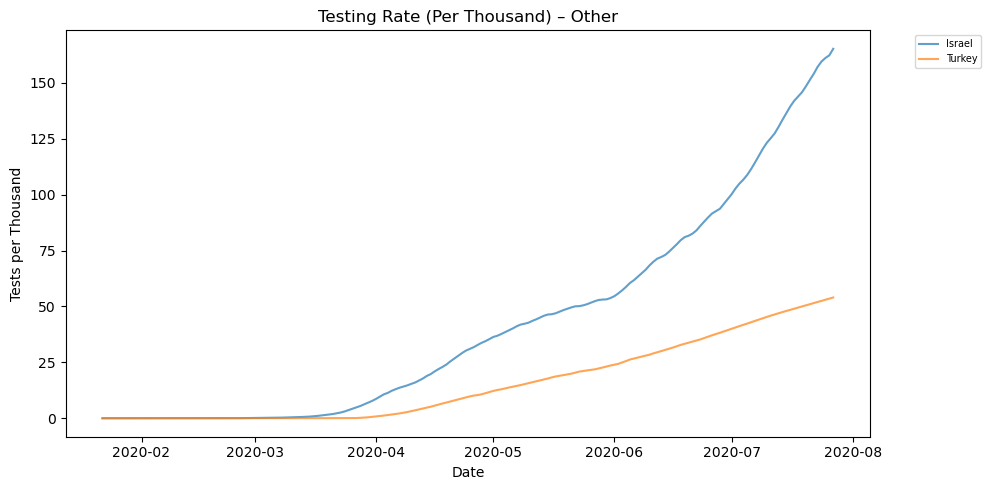

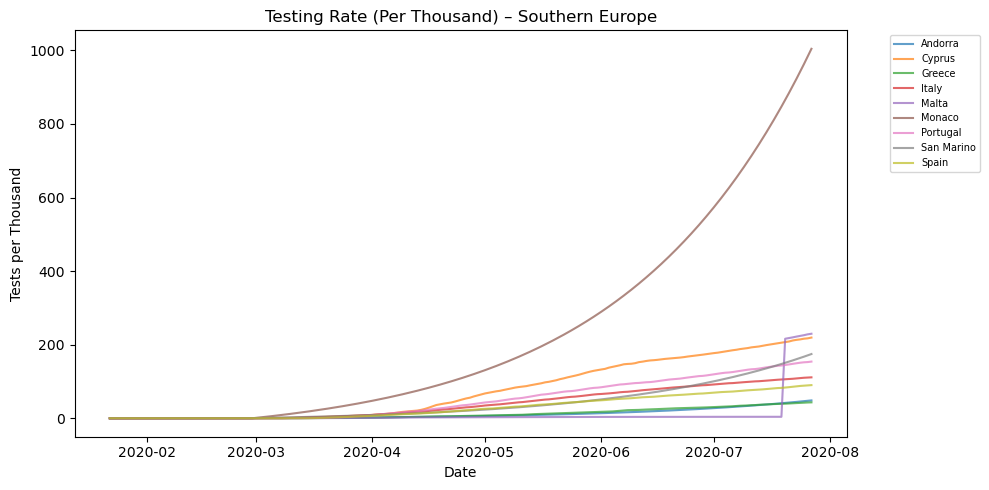

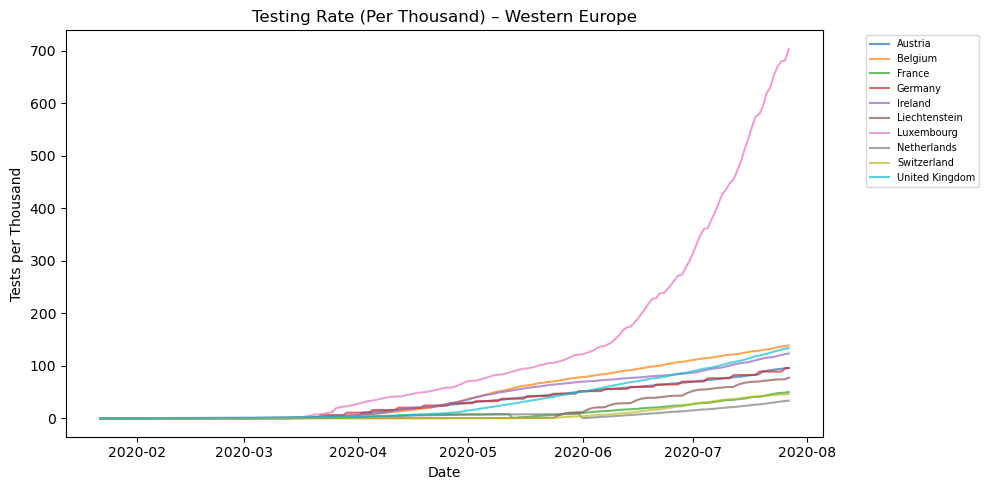

In [29]:
for region_name, subset in df.groupby("Region"):
    plt.figure(figsize=(10,5))
    for country, group in subset.groupby("Country/Region"):
        plt.plot(group["Date"], group["total_tests_per_thousand"], label=country, alpha=0.7)

    plt.title(f"Testing Rate (Per Thousand) – {region_name}")
    plt.xlabel("Date")
    plt.ylabel("Tests per Thousand")
    plt.legend(fontsize=7, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

<Axes: >

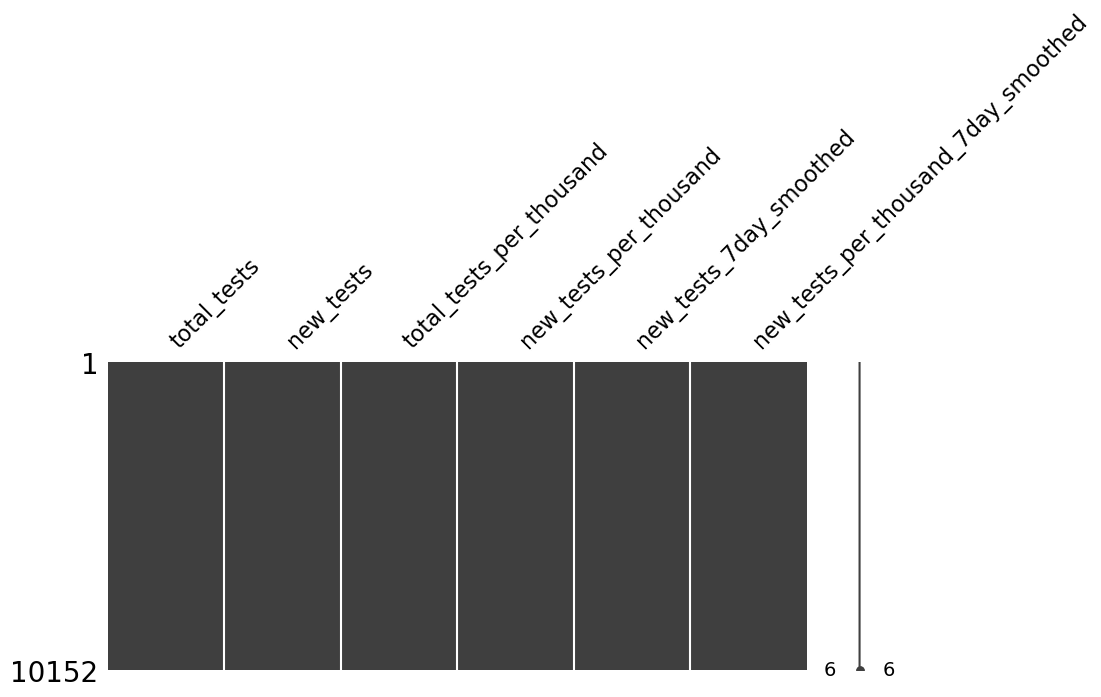

In [30]:
msno.matrix(df[testing_cols], figsize=(10, 4))

In [31]:
#clean up testing data and bringing it to level with other metrics 

df["total_tests_per_100"] = df["total_tests"] / df["Population"] * 100
df["new_tests_per_100"] = df["new_tests"] / df["Population"] * 100



In [32]:
df.to_pickle(r'pickles/df1.2.pkl')